In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
from glob import glob
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json


# Sample Definition

In [19]:
file_zip = 'insert path'       #"C:\\Users\\aless\\Desktop\\reddit_distr\\posts"

os.chdir(file_zip)

# Mostra i file estratti
print("Files estratti:")
print(os.listdir())
rewards=sorted(os.listdir())
rewards=rewards[9:]
rewards

Files estratti:
['r_ethtrader_comments_2016.jsonl', 'r_ethtrader_comments_2017.jsonl', 'r_ethtrader_comments_2018.jsonl', 'r_ethtrader_comments_2018_bkp.jsonl', 'r_ethtrader_comments_2019.jsonl', 'r_ethtrader_comments_2020.jsonl', 'r_ethtrader_comments_2021.jsonl', 'r_ethtrader_comments_2022.jsonl', 'r_ethtrader_comments_2023.jsonl', 'r_ethtrader_posts_2016.jsonl', 'r_ethtrader_posts_2017.jsonl', 'r_ethtrader_posts_2018.jsonl', 'r_ethtrader_posts_2019.jsonl', 'r_ethtrader_posts_2020.jsonl', 'r_ethtrader_posts_2021.jsonl', 'r_ethtrader_posts_2022.jsonl', 'r_ethtrader_posts_2023.jsonl']


['r_ethtrader_posts_2016.jsonl',
 'r_ethtrader_posts_2017.jsonl',
 'r_ethtrader_posts_2018.jsonl',
 'r_ethtrader_posts_2019.jsonl',
 'r_ethtrader_posts_2020.jsonl',
 'r_ethtrader_posts_2021.jsonl',
 'r_ethtrader_posts_2022.jsonl',
 'r_ethtrader_posts_2023.jsonl']

In [20]:
import json
all_data = pd.DataFrame()

for i in rewards:
  print(i)
  author=[]
  text=[]
  up_down=[]
  year=[]
  link_flair_text=[]
  num_comments=[]
  media=[]
  with open(i, 'r', encoding='UTF-8') as f:
      for line in f:
        line=json.loads(line)
        author.append(line['author'])
        all_text=line['title'] + line['selftext']
        text.append(all_text.replace('\n', ' '))
        up_down.append(line['ups'])
        link_flair_text.append(line['link_flair_text'] if 'link_flair_text' in line else None)
        num_comments.append(line['num_comments'] if 'num_comments' in line else None)
        media.append(line['media'] if 'media' in line else None)


        if '2016' in i:
          year.append('2016')
        elif '2017' in i:
          year.append('2017')
        elif '2018' in i:
          year.append('2018')
        elif '2019' in i:
          year.append('2019')
        elif '2020' in i:
          year.append('2020')
        elif '2021' in i:
          year.append('2021')
        elif '2022' in i:
          year.append('2022')
        elif '2023' in i:
          year.append('2023')


  data = pd.DataFrame({
      'Author': author,
      'Full Text': text,
      'Up-Down': up_down,
      'Year': year,
      'Num_Comments': num_comments,
      'Media': media,
      'link_flair_text': link_flair_text
  })
  all_data = pd.concat([all_data, data], ignore_index=True)

all_data=all_data[all_data['Author']!='[deleted]']
all_data

r_ethtrader_posts_2016.jsonl
r_ethtrader_posts_2017.jsonl
r_ethtrader_posts_2018.jsonl
r_ethtrader_posts_2019.jsonl
r_ethtrader_posts_2020.jsonl
r_ethtrader_posts_2021.jsonl
r_ethtrader_posts_2022.jsonl
r_ethtrader_posts_2023.jsonl


,Author,Full Text,Up-Down,Year,Num_Comments,Media,link_flair_text
0,carlslarson,How would a switch to Proof of Stake affect th...,10,2016,9,None,None
1,heliumcraft,Price predictions?What do you think will be th...,12,2016,27,None,None
2,StonedSheep,Exchange?Which exchanges will Ethereum first s...,5,2016,7,None,None
4,heliumcraft,What software do you use for trading?,3,2016,2,None,None
5,carlslarson,What factors will influence the price of Ether?,9,2016,11,None,None
...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,1,None,News
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,1,None,None
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,1,None,News
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,1,{'oembed': {'author_name': 'Web3 Stories & New...,Media


In [21]:
all_data['Year']= all_data['Year'].astype(int)
all_data

,Author,Full Text,Up-Down,Year,Num_Comments,Media,link_flair_text
0,carlslarson,How would a switch to Proof of Stake affect th...,10,2016,9,None,None
1,heliumcraft,Price predictions?What do you think will be th...,12,2016,27,None,None
2,StonedSheep,Exchange?Which exchanges will Ethereum first s...,5,2016,7,None,None
4,heliumcraft,What software do you use for trading?,3,2016,2,None,None
5,carlslarson,What factors will influence the price of Ether?,9,2016,11,None,None
...,...,...,...,...,...,...,...
365557,MasterpieceLoud4931,"In 2023, the US government tried to kill crypto",7,2023,1,None,News
365558,Prog132487,Biggest Crypto and NFT Games of 2023 - Decrypt,1,2023,1,None,None
365559,teeceaustralia,Vitalik Buterin Reveals Ethereum’s Road Map Fo...,7,2023,1,None,News
365560,aItalianStallion,"Chainlink News: CCIP, Data Feeds & Streams, Pr...",0,2023,1,{'oembed': {'author_name': 'Web3 Stories & New...,Media


In [23]:
# stratified sample based on Year and Text Length

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

all_data['Text Length'] = all_data['Full Text'].str.len()

all_data['Text Length Category'] = pd.qcut(all_data['Text Length'], q=6, labels=['1', '2', '3','4','5','6'])

stratification_columns = ['Year', 'Text Length Category']


samples = []
for i in range(6):
    stratified_sample, _ = train_test_split(all_data, train_size=1000, stratify=all_data[stratification_columns], random_state=i)
    samples.append(stratified_sample)

samples

[                    Author                                          Full Text  \
 298678        snowcelosa16  WHAT ARE YOU WAITING FOR? GRABE YOUR CHANCE TO...   
 48103            hummer888                    Kraken.com bad support[removed]   
 74213          Enderhero90  I wouldn't want to miss out on any 69 action. ...   
 157293  EthTraderCommunity   Ethereum 2.0: crypto prices celebrate the launch   
 316491      Loud_Dingo7261  LUNA and UST Drama: Is Now the Right Time To B...   
 ...                    ...                                                ...   
 119561             towjamb  From Bitcoin To No Coin, Crypto World Under Pr...   
 35049       bearjewpacabra  Apple Responds To Google-Avis, Announces Deal ...   
 110299       smitty4popcon      ConsenSys Seeking $200 Million In New Funding   
 89521             pijuicer                 The CyberVein CVT Airdrop is Live!   
 304222  EthTraderCommunity  As the US and EU fight over crypto regulation ...   
 
         Up-Do

In [25]:
samples[1]

,Author,Full Text,Up-Down,Year,Num_Comments,Media,link_flair_text,Text Length,Text Length Category
292869,Inevitable-Pay-8405,FBI is launching team to address crypto exploi...,1,2022,3,None,News,52,2
101931,ev1501,Thanksgiving 2018 (Crypto Edition),1,2018,3,None,COMEDY,34,1
345106,AutoModerator,"Daily General Discussion - March 23, 2023 (UTC...",2,2023,52,None,Discussion,998,6
64878,mcgrow,Today we choose the dark one.. be strong as a ...,4,2017,1,None,COMEDY,57,3
314072,Financial_Mine8656,Monopolon PH 🇵🇭 (@MonopolonPH) We aim to becom...,1,2022,0,None,Media,83,4
...,...,...,...,...,...,...,...,...,...
182559,alexmenchik,Investors call&#x200B; https://preview.redd.i...,2,2021,0,None,Strategy,2185,6
137266,MainEthereumNetwork,PlutusDeFi May 2020 Update — The Team Grows!,1,2020,0,None,ANNOUNCEMENT,44,2
157535,NeoBag201kgdeadlift,OmiseGo team dumps ownership of OMG to a no na...,1,2020,7,None,TECHNICALS,261,6
260305,Many_Arm7466,My type of date ☺️,23,2021,3,None,Comedy,18,1


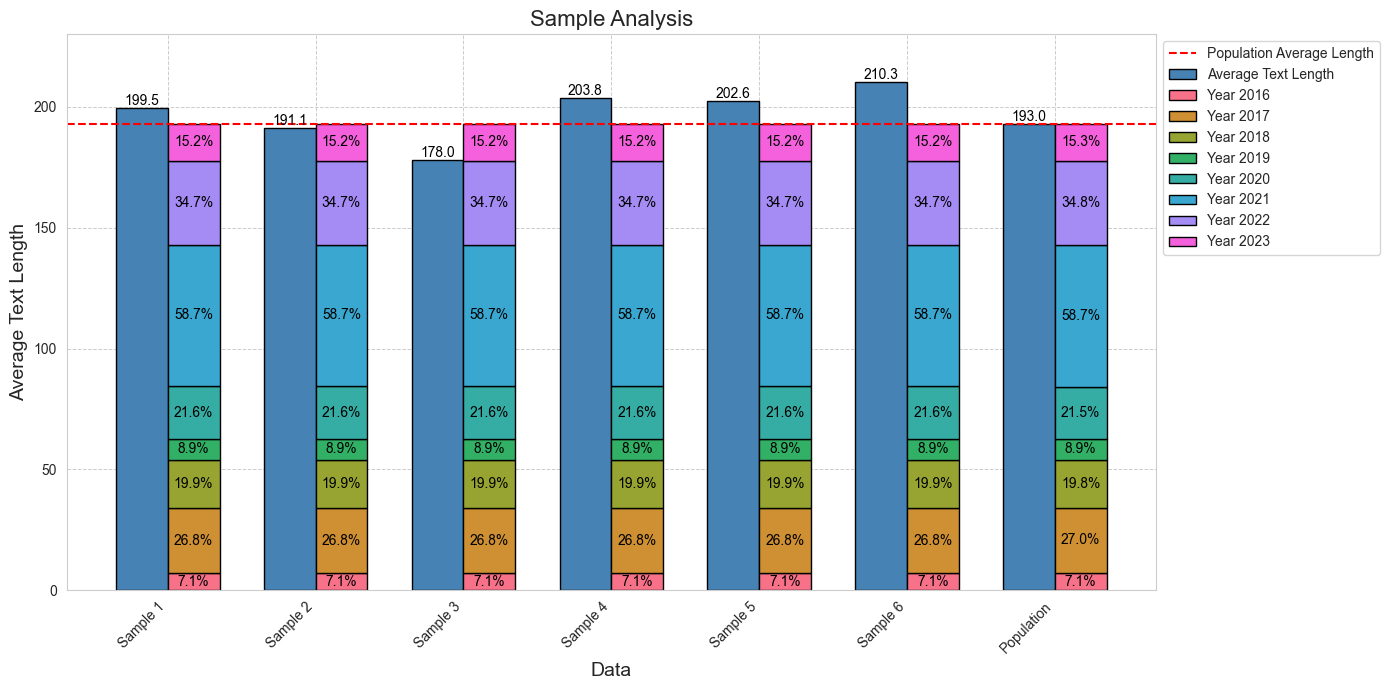

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_palette("colorblind")  
sns.set_style("whitegrid")  

sample_list = ['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5', 'Sample 6', 'Population']
sample_1_len = samples[0]['Full Text'].str.len().mean()
sample_2_len = samples[1]['Full Text'].str.len().mean()
sample_3_len = samples[2]['Full Text'].str.len().mean()
sample_4_len = samples[3]['Full Text'].str.len().mean()
sample_5_len = samples[4]['Full Text'].str.len().mean()
sample_6_len = samples[5]['Full Text'].str.len().mean()
all_data_len = all_data['Full Text'].str.len().mean()

text_lengths = [sample_1_len, sample_2_len, sample_3_len, sample_4_len, sample_5_len, sample_6_len, all_data_len]

sample_1_pub = samples[0].groupby('Year').size()
sample_2_pub = samples[1].groupby('Year').size()
sample_3_pub = samples[2].groupby('Year').size()
sample_4_pub = samples[3].groupby('Year').size()
sample_5_pub = samples[4].groupby('Year').size()
sample_6_pub = samples[5].groupby('Year').size()
all_data_pub = all_data.groupby('Year').size()

years = sorted(list(set(sample_1_pub.index).union(sample_2_pub.index, sample_3_pub.index, 
                                                   sample_4_pub.index, sample_5_pub.index, sample_6_pub.index, all_data_pub.index)))

pub_year_counts = pd.DataFrame({
    'Sample 1': sample_1_pub.reindex(years, fill_value=0),
    'Sample 2': sample_2_pub.reindex(years, fill_value=0),
    'Sample 3': sample_3_pub.reindex(years, fill_value=0),
    'Sample 4': sample_4_pub.reindex(years, fill_value=0),
    'Sample 5': sample_5_pub.reindex(years, fill_value=0),
    'Sample 6': sample_6_pub.reindex(years, fill_value=0),
    'All Data': all_data_pub.reindex(years, fill_value=0)
}, index=years)

pub_year_proportions = pub_year_counts.div(pub_year_counts.sum(axis=0), axis=1)

fig, ax1 = plt.subplots(figsize=(14, 7))
x = np.arange(len(sample_list))
width = 0.35

bar1 = ax1.bar(x - width/2, text_lengths, width, label='Average Text Length', color='steelblue', edgecolor='black')

bottom = np.zeros(len(sample_list)) 
colors = sns.color_palette("husl", len(years))  

for i, year in enumerate(years):
    proportions = pub_year_proportions.loc[year]
    scaled_proportions = proportions * all_data_len
    ax1.bar(x + width/2, scaled_proportions, width, bottom=bottom, label=f'Year {year}', color=colors[i], edgecolor='black')
    bottom += scaled_proportions  
    
for pos, bar in enumerate(ax1.containers):
    if pos not in [0, 9, 16, 23, 30, 37, 44]:
        ax1.bar_label(bar, label_type='center', fmt='%.1f%%', color='Black')
    else:
        ax1.bar_label(bar, label_type='edge', fmt='%.1f', color='Black')


ax1.set_xlabel('Data', fontsize=14)
ax1.set_ylabel('Average Text Length', fontsize=14)
ax1.set_title('Sample Analysis', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(sample_list, rotation=45, ha='right')
ax1.set_ylim([0, 230]) 
ax1.axhline(y=all_data_len, color='red', linestyle='--', label='Population Average Length')
ax1.grid(True, which='both', linestyle='--', linewidth=0.7)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


# Lables analysis

In [14]:
df = pd.read_excel('insert the path')      #"C:\\Users\\aless\\Desktop\\Unimib\\tesi\\sample_final.xlsx"
df

,Unnamed: 0,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3
0,0,grandekate,"This is very easy money, just inviting friends...",False,2019,3,3.0,3
1,1,levi97zzz,All aboard to 3k!!! 🚀🚀🚀,False,2021,3,3.0,3
2,2,aminok,A Democrat supporting technological openness a...,True,2023,2,2.0,2
3,3,Gringo4,Crypto markets today .. COMP 🚀,False,2020,2,2.0,2
4,4,No_Warthog_6864,Be selfless today community[removed],False,2023,3,3.0,3
...,...,...,...,...,...,...,...,...
5995,5995,Suthekingg,"Crypto Anonymity Must End, States Top Russian ...",False,2022,3,3.0,3
5996,5996,AutoModerator,"Daily General Discussion - December 19, 2023 (...",False,2023,3,3.0,3
5997,5997,Gringo4,India’s Supreme court has the lifted the ban o...,False,2020,2,2.0,2
5998,5998,frenchhoudini,Correction: GNT is not tradable on EtherDelta ...,False,2016,1,1.0,1


In [15]:
a=[]
for i in df['Valutatore 2']:
    if i==33.0:
        a.append(3.0)    
    else:
        a.append(i)
df['Valutatore 2'] =a
    

In [16]:
# extraction of the most frequent value, the median if all are different.
new_column = []
for i, row in df.iterrows():
    values = [row['Valutatore 1'], row['Valutatore 2'], row['Valutatore 3']]
    new_column.append(sorted(values)[1])


df['Final_Label'] = new_column
df


,Unnamed: 0,Author,Full Text,Contiene foto o video?,Year,Valutatore 1,Valutatore 2,Valutatore 3,Final_Label
0,0,grandekate,"This is very easy money, just inviting friends...",False,2019,3,3.0,3,3.0
1,1,levi97zzz,All aboard to 3k!!! 🚀🚀🚀,False,2021,3,3.0,3,3.0
2,2,aminok,A Democrat supporting technological openness a...,True,2023,2,2.0,2,2.0
3,3,Gringo4,Crypto markets today .. COMP 🚀,False,2020,2,2.0,2,2.0
4,4,No_Warthog_6864,Be selfless today community[removed],False,2023,3,3.0,3,3.0
...,...,...,...,...,...,...,...,...,...
5995,5995,Suthekingg,"Crypto Anonymity Must End, States Top Russian ...",False,2022,3,3.0,3,3.0
5996,5996,AutoModerator,"Daily General Discussion - December 19, 2023 (...",False,2023,3,3.0,3,3.0
5997,5997,Gringo4,India’s Supreme court has the lifted the ban o...,False,2020,2,2.0,2,2.0
5998,5998,frenchhoudini,Correction: GNT is not tradable on EtherDelta ...,False,2016,1,1.0,1,1.0


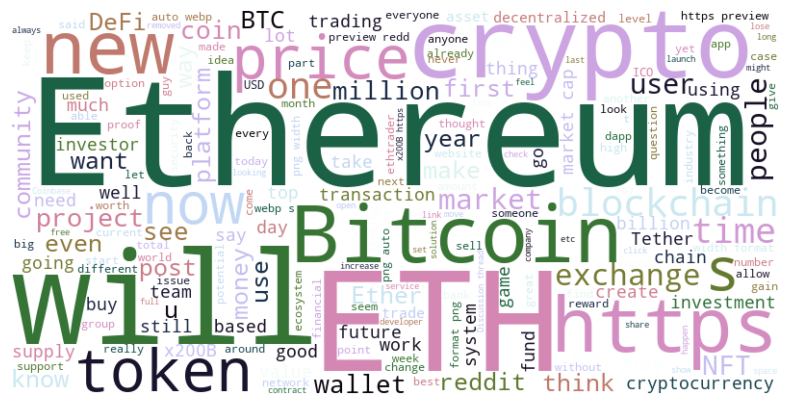

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word Cloud for 'Deserving of Reward' (Label 1)
text = " ".join(df[df['Final_Label'] == 1.0]['Full Text'].astype(str))


    
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap='cubehelix').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


C:\Users\aless\AppData\Local\Temp\ipykernel_40840\473971243.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Final_Label', y='Count', data=label_counts_df, palette=custom_palette)
C:\Users\aless\AppData\Local\Temp\ipykernel_40840\473971243.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Deserving of reward', 'Partially deserving of reward', 'Not deserving of reward', 'Unable to evaluate'], rotation=0, ha='center')


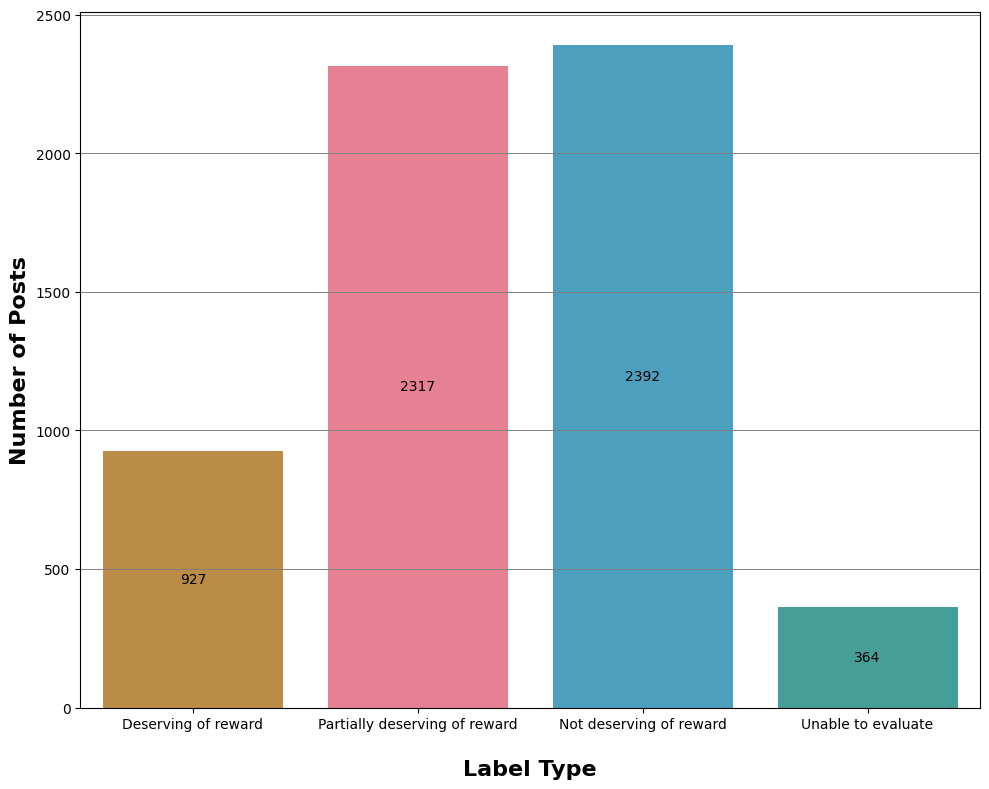

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the frequency of each label
label_counts = df['Final_Label'].value_counts()

# Create a DataFrame for the counts to use for ordering
label_counts_df = label_counts.reset_index()
label_counts_df.columns = ['Final_Label', 'Count']

# Sort the DataFrame by count in descending order
label_counts_df = label_counts_df.sort_values(by='Count', ascending=False)

husl_palette = sns.color_palette('husl', 8)

# Extract specific colors from the palette
custom_palette = [husl_palette[i] for i in [1, 0, 5, 4]]

# Plot the horizontal barplot with the custom palette
plt.figure(figsize=(10,8))
ax = sns.barplot(x='Final_Label', y='Count', data=label_counts_df, palette=custom_palette) 

# Add labels inside the bars
for pos, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='center', color='black')

# Customize axis labels and title
ax.set_ylabel('Number of Posts', fontsize=16, fontweight='bold')
ax.set_xlabel('Label Type', fontsize=16, fontweight='bold', labelpad=20)  # Add labelpad to increase space

# Remove default x-tick labels and set custom labels
ax.set_xticklabels(['Deserving of reward', 'Partially deserving of reward', 'Not deserving of reward', 'Unable to evaluate'], rotation=0, ha='center')

# Add gridlines only on the y-axis for better readability
ax.yaxis.grid(True, linestyle='-', linewidth=0.7, color='gray')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()
